In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
def dynamical_model1(x, alpha):
    return alpha - (x ** 2)

In [3]:
def dynamical_model2(x, alpha):
    return alpha - 2 * (x **2) - 3

In [9]:
# Create the bifurcation diagram
def bifurcation_diagram(seed, step=0.01, r_min=-1, r_max=5):
    Alpha = []
    X = []
    
    alpha_range = np.linspace(r_min, r_max, int(1/step))
    for alpha in alpha_range:
        sol = fsolve(dynamical_model2, [-0.5, 0.5, 0.1, -0.1, 2, -2], args=[alpha], full_output=1)
        if sol[-2] == 1:
          for s in sol[0]:
            Alpha.append(alpha)
            X.append(s)
    return Alpha, X 

r_min, r_max = -1, 5
Alpha, X = bifurcation_diagram(0.5, step=0.0001, r_min=r_min, r_max=r_max)

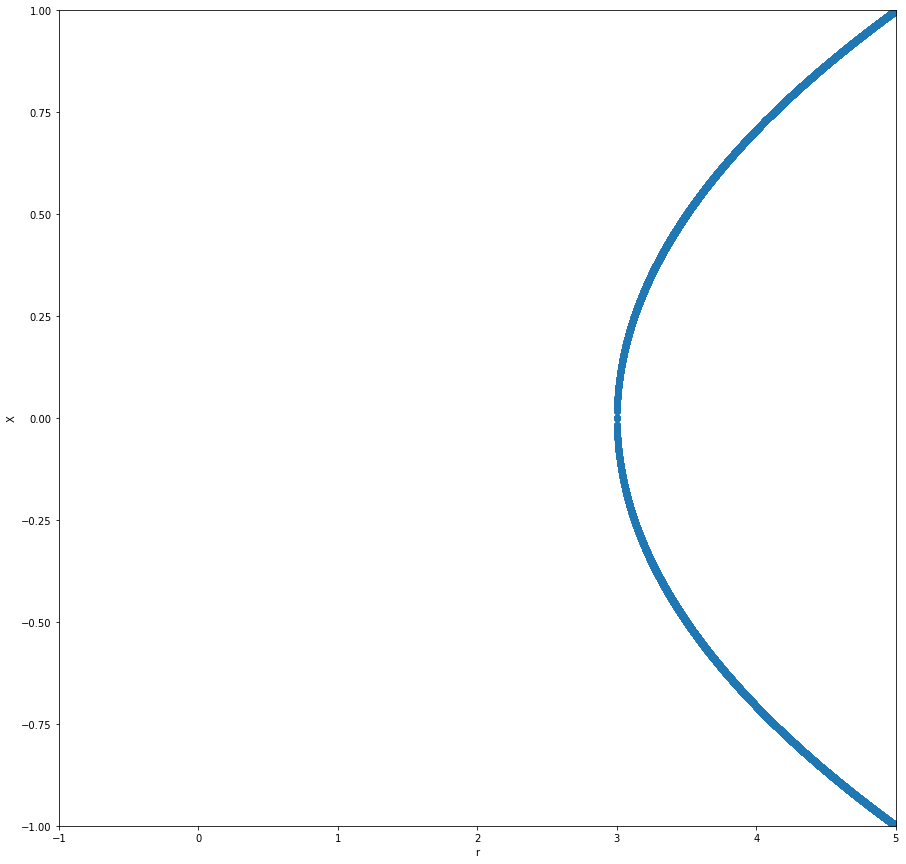

In [10]:
plt.figure(figsize=(15,15))
plt.plot(Alpha, X, ls='', marker='o')
plt.ylim(min(X), max(X))
plt.xlim(r_min, r_max)
plt.xlabel('r')
plt.ylabel('X')
plt.show()